# Remote Working Insights for Data Scientist

## Installation Cell
The installation line is standard for setting up the environment

In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


## Imports and Initialization
Initialise the necessary libraries and loads the dataset into a pandas DataFrame

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the Excel file
file_path = '/Users/test/Desktop/BA project dataset/cleaned_data.xlsx'

# Try to load the data into a DataFrame and handle potential errors
try:
    data = pd.read_excel(file_path, engine='openpyxl')
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")
    raise

# Display the first few rows and DataFrame info
print("First few rows of the DataFrame:")
print(data.head())
print("\nDataFrame Info:")
data.info()

First few rows of the DataFrame:
      Country  NumDataScientists  AvgMcDonaldsMealCost  AvgInternetCost  \
0     Algeria                  2                  3.74            42.21   
1   Argentina                  1                  5.37            21.36   
2   Australia                  1                  9.24            52.15   
3  Bangladesh                 13                  4.88            20.70   
4      Brazil                  2                  6.21            19.84   

   HappinessIndex  BroadbandMbps  MobileMbps  TaxBurden  AvgHourlyRate  \
0           5.122           9.72       11.31       67.2          44.00   
1           5.967          38.47       20.07       73.3          15.00   
2           7.162          50.89       68.35       62.5          30.00   
3           5.155          31.52        9.81       82.6          22.03   
4           6.293          87.52       23.84       69.9          36.50   

   AvgJobSuccess  Avgtotalhours  Avgtotaljobs  
0           0.90       

## Missing Data and Summarization
Generating summary statistics and checking for missing data

In [3]:
# Calculate summary statistics and check for missing values
summary_stats = data.describe()
missing_values = data.isnull().sum()

print("Summary Statistics:")
print(summary_stats)
print("\nMissing Values by Column:")
print(missing_values)

Summary Statistics:
       NumDataScientists  AvgMcDonaldsMealCost  AvgInternetCost  \
count          25.000000             25.000000        25.000000   
mean            4.960000              6.313200        32.436800   
std             9.085153              2.241879        19.728295   
min             1.000000              3.230000         4.680000   
25%             1.000000              3.890000        19.840000   
50%             1.000000              6.190000        32.230000   
75%             3.000000              8.850000        42.210000   
max            39.000000             10.050000        76.760000   

       HappinessIndex  BroadbandMbps  MobileMbps  TaxBurden  AvgHourlyRate  \
count       25.000000      25.000000   25.000000  25.000000      25.000000   
mean         5.647200      47.512000   35.702000  77.536000      42.157200   
std          1.105372      35.468964   25.613828  10.947864      33.893393   
min          3.777000       2.740000    0.530000  52.100000     

## Exploratory Data Analysis (EDA)
Include statistical summaries, value counts, and correlation matrices, along with a heatmap visualization

Descriptive Statistics Summary:
       NumDataScientists  AvgMcDonaldsMealCost  AvgInternetCost  \
count          25.000000             25.000000        25.000000   
mean            4.960000              6.313200        32.436800   
std             9.085153              2.241879        19.728295   
min             1.000000              3.230000         4.680000   
25%             1.000000              3.890000        19.840000   
50%             1.000000              6.190000        32.230000   
75%             3.000000              8.850000        42.210000   
max            39.000000             10.050000        76.760000   

       HappinessIndex  BroadbandMbps  MobileMbps  TaxBurden  AvgHourlyRate  \
count       25.000000      25.000000   25.000000  25.000000      25.000000   
mean         5.647200      47.512000   35.702000  77.536000      42.157200   
std          1.105372      35.468964   25.613828  10.947864      33.893393   
min          3.777000       2.740000    0.530000  52

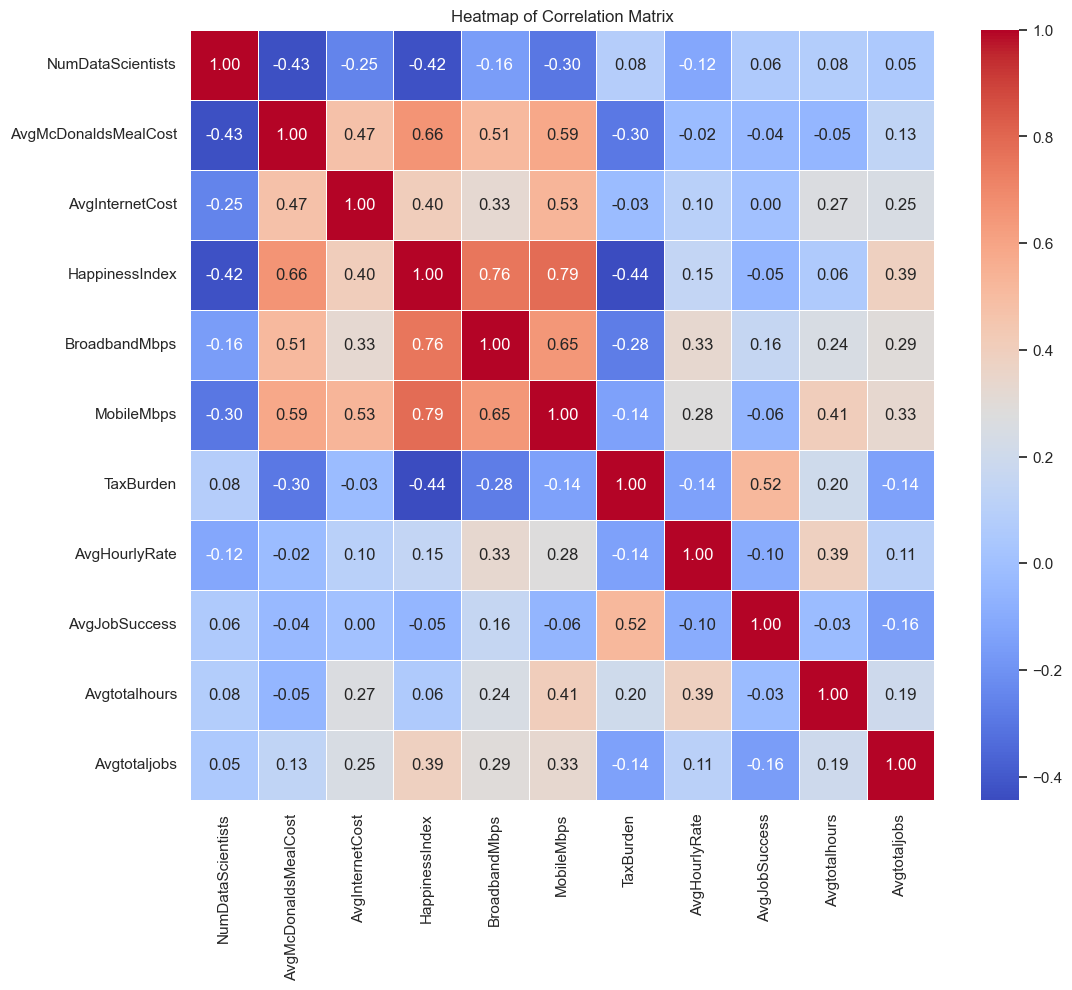

In [4]:
# Generate descriptive statistics summary for numeric variables
numeric_stats = data.describe()

# Display the frequency distribution of countries
country_distribution = data['Country'].value_counts()

print("Descriptive Statistics Summary:")
print(numeric_stats)
print("\nCountry Frequency Distribution:")
print(country_distribution)

# Calculate the correlation matrix for numeric columns and visualize it
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Histograms for Distribution Analysis
Create histograms to visualise multiple distributions

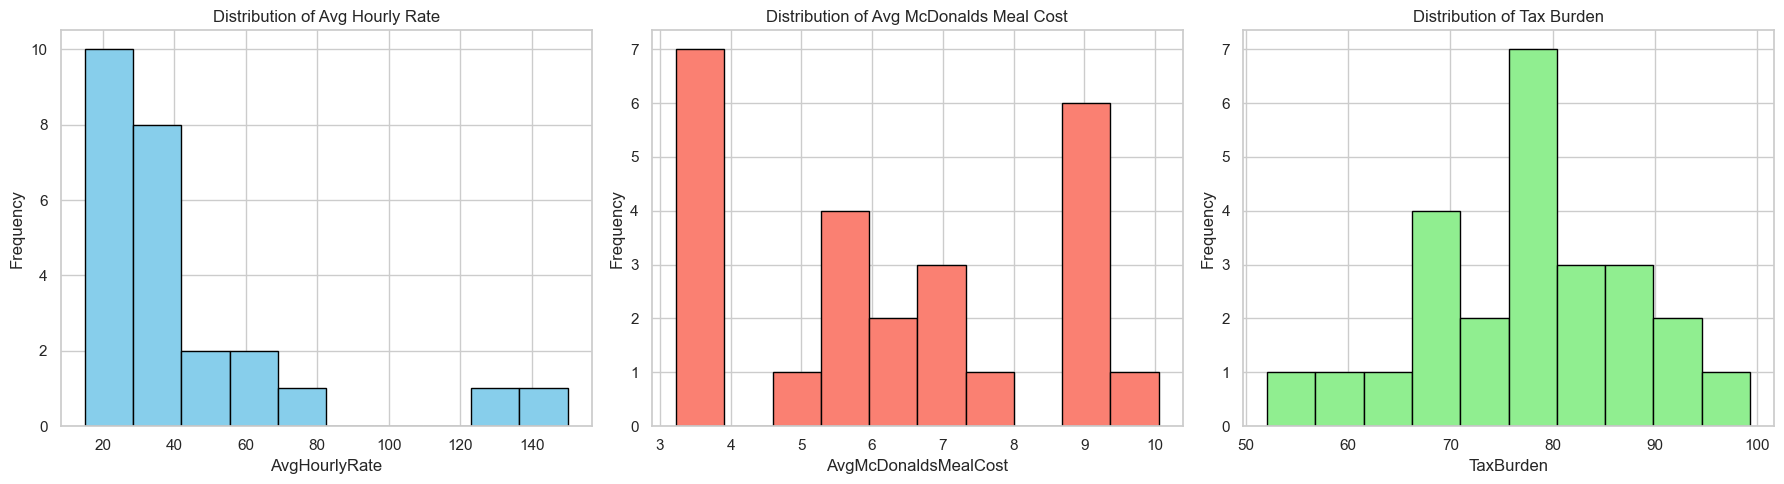

In [5]:
# Plot histograms for selected numeric columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
columns = ['AvgHourlyRate', 'AvgMcDonaldsMealCost', 'TaxBurden']
titles = ['Distribution of Avg Hourly Rate', 'Distribution of Avg McDonalds Meal Cost', 'Distribution of Tax Burden']
colors = ['skyblue', 'salmon', 'lightgreen']

for ax, col, title, color in zip(axes, columns, titles, colors):
    data[col].plot(kind='hist', ax=ax, bins=10, color=color, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

## Salary-to-Cost-of-Living Ratios
Calculating new derived metrics (Salary-to-Cost-of-Living Ratio) and sorting by these to derive insights

In [21]:
# Calculate Salary-to-Cost-of-Living Ratios and sort to find top countries
data['Salary_to_Cost_of_Living_Ratio'] = data['AvgHourlyRate'] / data['AvgMcDonaldsMealCost']
sorted_ratios = data[['Country', 'Salary_to_Cost_of_Living_Ratio']].sort_values(by='Salary_to_Cost_of_Living_Ratio', ascending=False)
print("Top 3 countries by Salary-to-Cost-of-Living Ratio:")
print(sorted_ratios.head(3))

Top 3 countries by Salary-to-Cost-of-Living Ratio:
          Country  Salary_to_Cost_of_Living_Ratio
21         Turkey                       43.731778
22        Ukraine                       16.393443
23  United States                       14.921171


## Tax Condition
Sorting and deriving insights regarding tax condition

In [20]:
# Sort the data by the TaxBurden column in ascending order to find the regions with the lowest tax burdens
sorted_tax_burdens = data[['Country', 'TaxBurden']].sort_values(by='TaxBurden')

# Display the countries with the lowest tax burdens
print("\nTop 3 countries by Tax Condition:")
print(sorted_tax_burdens.head(3))


Top 3 countries by Tax Condition:
      Country  TaxBurden
9      France       52.1
11    Germany       59.9
2   Australia       62.5


## Net Disposable Income
Sorting and deriving insights regarding net disposable income

In [22]:
# Calculate Net Disposable Income and sort to find top countries
data['Net_Disposable_Income'] = data['AvgHourlyRate'] * (1 - data['TaxBurden'] / 100) - data['AvgMcDonaldsMealCost']
sorted_net_income = data[['Country', 'Net_Disposable_Income']].sort_values(by='Net_Disposable_Income', ascending=False)
print("\nTop 3 countries by Net Disposable Income:")
print(sorted_net_income.head(3))


Top 3 countries by Net Disposable Income:
          Country  Net_Disposable_Income
21         Turkey                34.5200
23  United States                23.0525
0         Algeria                10.6920


## Remote Work Conditions
Creating a composite score for remote work conditions and then analyzing these scores is a strategic use of the data

In [23]:
# Calculate the Remote Work Score for each country
data['Remote_Work_Score'] = (data['BroadbandMbps'] + data['MobileMbps']) / data['AvgInternetCost']

# Sort the data by this new column in descending order to find the best conditions for remote work
sorted_remote_work = data[['Country', 'Remote_Work_Score']].sort_values(by='Remote_Work_Score', ascending=False)

# Display the top countries with the best conditions for remote work
print("\nTop 3 countries by Remote Work Condition:")
print(sorted_remote_work.head(3))


Top 3 countries by Remote Work Condition:
    Country  Remote_Work_Score
22  Ukraine          17.427350
8   Finland           7.187151
21   Turkey           7.062651


## Employment Opportunities and Infrastructure
Calculates correlation coefficients to explore relationships between job availability and internet infrastructure, which are pertinent in studies of economic conditions and remote work viability

In [24]:
# Calculate the correlation between employment opportunities (Avgtotaljobs) and internet speeds (BroadbandMbps, MobileMbps)
correlation_jobs_broadband = data['Avgtotaljobs'].corr(data['BroadbandMbps'])
correlation_jobs_mobile = data['Avgtotaljobs'].corr(data['MobileMbps'])

(correlation_jobs_broadband, correlation_jobs_mobile)

(0.29134359962141626, 0.33382940818085516)

## Regression Analysis
The regression analysis section includes normalization of features, model fitting, and plotting, providing a robust statistical examination of the relationship between a constructed composite score vs. a happiness index

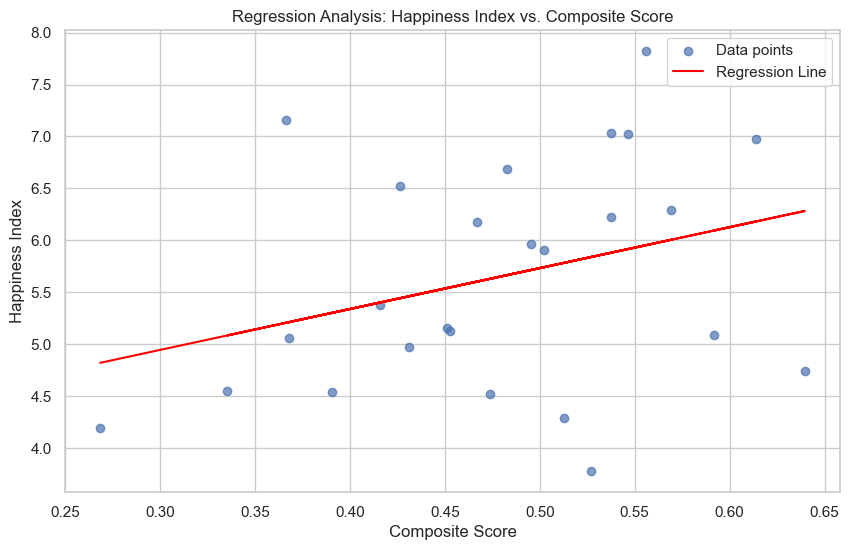

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessIndex   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.649
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.117
Time:                        18:37:20   Log-Likelihood:                -36.105
No. Observations:                  25   AIC:                             76.21
Df Residuals:                      23   BIC:                             78.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7626      1.178      3.195      0.004       1.327       6.199
CompositeScore     3.9399      2.421      1.627      0.117      -1.068       8.948
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.441
Skew:                           0.029   Prob(JB):                        0.802
Kurtosis:                       2.352   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Selecting relevant columns for Composite Score calculation
relevant_columns = ['AvgMcDonaldsMealCost', 'AvgInternetCost', 'BroadbandMbps', 
                    'MobileMbps', 'TaxBurden', 'AvgHourlyRate', 'AvgJobSuccess']

# Extracting the relevant columns for processing
features = data[relevant_columns]

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (MinMax Scaling)
normalized_features = scaler.fit_transform(features)

# Inverting values where lower is better (Costs and TaxBurden)
normalized_features[:, 0] = 1 - normalized_features[:, 0]  # AvgMcDonaldsMealCost
normalized_features[:, 1] = 1 - normalized_features[:, 1]  # AvgInternetCost
normalized_features[:, 4] = 1 - normalized_features[:, 4]  # TaxBurden

# Calculate the Composite Score as the mean of all normalized features
data['CompositeScore'] = normalized_features.mean(axis=1)

# Check the first few rows of the dataframe with the new CompositeScore column
data.head(), data[['HappinessIndex', 'CompositeScore']].corr()

# Setting up the data for regression
X = sm.add_constant(data['CompositeScore'])  # adding a constant for the intercept
Y = data['HappinessIndex']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Summary of the regression model
regression_summary = model.summary()

# Prepare data for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['CompositeScore'], data['HappinessIndex'], alpha=0.7, label='Data points')
plt.plot(data['CompositeScore'], model.predict(X), color='red', label='Regression Line')
plt.title('Regression Analysis: Happiness Index vs. Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Happiness Index')
plt.legend()
plt.grid(True)
plt.show()

regression_summary